CSDA 1050 Sprint 2

Sprint 2 contains the modelling/analysis phase of the project and it continues from where Sprint 1 ended. At the start of the project the goal was to try to identify the marginal difference in rent price between tenured renters and new renters in Toronto, specifically looking at apartments. During the completion of the Sprint and project many gaps were identified, and this became increasingly more difficult. The Sprint contains an attempt at forecasting the average apartment rent price in Toronto. This can be very useful for prospective renters, landlords, and the City of Toronto. The code and rationale are in the notebook and the report.


In [16]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import xlrd
from matplotlib import pyplot as plt

In [17]:
cd C:\Users\nick\Documents\Certificate in Big Data Analytics and Certificate in Predictive Analytics\Certificate in Predictive Analytics\CSDA 1050\Datasets

C:\Users\nick\Documents\Certificate in Big Data Analytics and Certificate in Predictive Analytics\Certificate in Predictive Analytics\CSDA 1050\Datasets


In [18]:
#Loading the datasets
TorontoRent = pd.read_csv("Toronto Average Rent Prices.csv")
TorontoRent.head(5)

,Year,Bachelor,BachelorChange,OneBedroom,OneBedroomChange,TwoBedroom,TwoBedroomChange,ThreeBedroomPlus,ThreeBedroomChange,CityAverage,CityAverageChange
0,2000,685,NaN,833,NaN,984,NaN,1186,NaN,907,7.50
1,2001,698,1.90,870,4.44,1039,5.59,1248,5.23,951,4.85
2,2002,733,5.01,894,2.76,1055,1.54,1279,2.48,976,2.63
3,2003,734,0.14,884,-1.12,1045,-0.95,1225,-4.22,961,-1.54
4,2004,730,-0.54,888,0.45,1061,1.53,1263,3.10,973,1.25


In [19]:
HouseholdIncome = gpd.read_file("Household Income.shp")
print("HouseholdIncome")
HouseholdIncome.head(5)

HouseholdIncome


,spatial_id,name,VALUE0,geometry
0,3520005,"Toronto, ON (CSD)",51415.0,"POLYGON ((-79.1520235957221 43.81438746510226,..."


In [20]:
Income = pd.read_csv("Toronto Income.csv")
Income.head(5)

,Year,Age group,UOM,Average Income,Median Income
0,2013,16 years and over,2017 constant dollars,"$44,900.00","$30,900.00"
1,2014,16 years and over,2017 constant dollars,"$45,700.00","$31,600.00"
2,2015,16 years and over,2017 constant dollars,"$46,100.00","$30,500.00"
3,2016,16 years and over,2017 constant dollars,"$47,600.00","$31,500.00"
4,2017,16 years and over,2017 constant dollars,"$48,500.00","$33,600.00"


In [21]:
Guidelines = pd.read_csv("Rent Increase Guidelines.csv")
Guidelines.head(5)

,Year,Guideline,InflationRate,Difference
0,1991,5.4,3.75,1.65
1,1992,6.0,2.17,3.83
2,1993,4.9,1.65,3.25
3,1994,3.2,0.23,2.97
4,1995,2.9,1.74,1.16


In [22]:
CPI = pd.read_csv("Inflation Rate Canada.csv")
CPI.head(5)

,Year,Inflation Rate
0,1984,3.72
1,1985,4.40
2,1986,4.21
3,1987,4.19
4,1988,3.88


In [23]:
#Lets try to forecast future average price using ARIMA
import pandas as pd
from matplotlib import pyplot
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import LinearRegression

In [24]:
    #Create new subset for only year and City Average price

TorontoRentSubset = pd.read_csv("Toronto Average Rent Prices.csv",
                                index_col=0)
TorontoRentSubset = TorontoRentSubset.drop(["Bachelor","BachelorChange","OneBedroom","OneBedroomChange","TwoBedroom","TwoBedroomChange","ThreeBedroomPlus","ThreeBedroomChange","CityAverageChange"], axis=1)
#View subset and index
print(TorontoRentSubset)
print(TorontoRentSubset.index)

      CityAverage
Year             
2000          907
2001          951
2002          976
2003          961
2004          973
2005          977
2006          995
2007          991
2008         1018
2009         1014
2010         1046
2011         1072
2012         1108
2013         1139
2014         1170
2015         1211
2016         1241
2017         1308
Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64', name='Year')


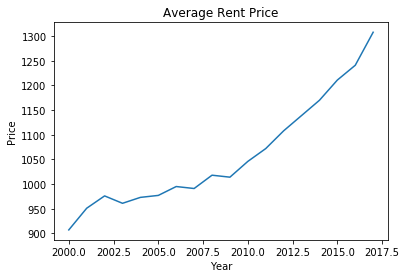

In [25]:
#Plotting the Average Rent Price, we can see a general upward trend
plt.plot(TorontoRent.Year,TorontoRent.CityAverage)
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Average Rent Price")
plt.show()

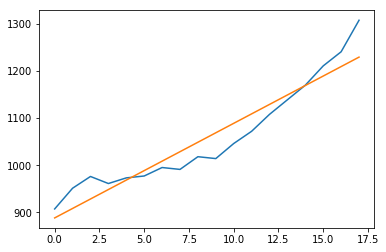

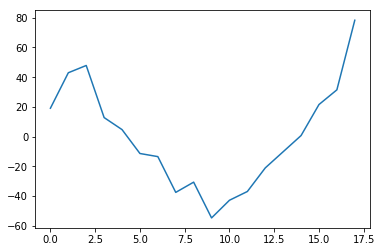

In [26]:
#Detrend by Model Fitting using  linear model

X = [i for i in range(0, len(TorontoRentSubset))]
X = np.reshape(X, (len(X), 1))
y = TorontoRentSubset.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(TorontoRentSubset))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()

C:\Users\nick\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


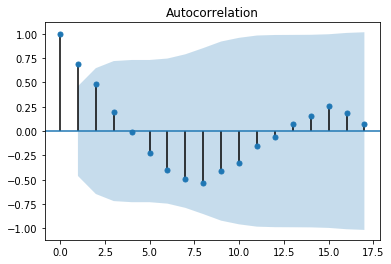

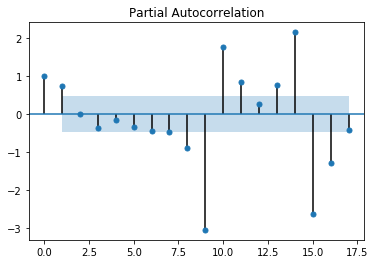

In [27]:
# plot ACF and PACF with 95% confidence interval
plot_acf(detrended)
plot_pacf(detrended)
pyplot.show()

Actual=1108.000000, Predicted=1079.699218
Actual=1139.000000, Predicted=1116.656325
Actual=1170.000000, Predicted=1161.014917
Actual=1211.000000, Predicted=1189.456927
Actual=1241.000000, Predicted=1239.477368
Actual=1308.000000, Predicted=1270.205296
Test Mean Squared Error: 545.961


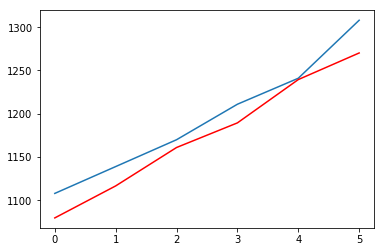

In [28]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#Create and use new subset csv file for only year and City Average price
def GetData(fileName):
    return read_csv(fileName, header=0,  index_col=0).values

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction
    
#Get Data
ActualData = GetData('TorontoRentSubset.csv')
NumberOfElements = len(ActualData)

#Use 70% of data as training, 30% to Test model
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]

#Create new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()


#Predict values using ARIMA model
for timepoint in range(len(TestData)):
	ActualValue =  TestData[timepoint]
	#forcast value
	Prediction = StartARIMAForecasting(Actual, 3,1,0)    
	print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
	#add it in the list
	Predictions.append(Prediction)
	Actual.append(ActualValue)

#Print MSE to see how good the model is
Error = mean_squared_error(TestData, Predictions)
print('Test Mean Squared Error: %.3f' % Error)

# plot with predictions in red, actual in blue
pyplot.plot(TestData)
pyplot.plot(Predictions, color='red')
pyplot.show()

We can see the MSE is 545.96 dollars meaning the model is over or under estimating the average rent price by 545.96 dollars.
This model is not the best as that is too large a number and should be be improved before it is used.
-Perhaps there are staionary issues and the model is not fully stationary and needs to be better transformed, maybe stabilizing the variance, this can all be tested
-Perhaps multiple models with different AR and MA terms
-Perhaps other modelling techniques
-Perhaps more/better data

Although ARIMA does not consider economical and political conditions, or correlations of all factors related to rent prices perhaps after the example above is cleaned up it can be useful for forecasting the average apartment rent price in Toronto.